**0: NumPy and the ndarray** | [1: Introduction to xarray](gridded_data_tutorial_1.ipynb)  | [2: Daymet data access](gridded_data_tutorial_2.ipynb) | [3: Investigating SWE at Mt. Rainier with Daymet](gridded_data_tutorial_3.ipynb)

# Notebook 0: NumPy and the ndarray
Waterhackweek 2020 | 
Steven Pestana (spestana@uw.edu)

**By the end of this notebook you will be able to:**
* Create and manipulate ndarrays
* Index and slice ndarrays

---

### NumPy: working with multi-dimensional arrays in python

The [NumPy](https://numpy.org/) library is at the core of the "[scientific python ecosystem](https://www.scipy.org/)". NumPy provides an `ndarray` data type which can be used to represent multi-dimensional gridded data. It also includes linear algebra functions and other useful math functions. 

See these resources for more detailed NumPy information and tutorials:
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [NumPy: creating and manipulating numerical data](https://scipy-lectures.org/intro/numpy/index.html)
* [Advanced NumPy](https://scipy-lectures.org/advanced/advanced_numpy/index.html)
* [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

---

**To get started, import NumPy and give it an alias `np` (this shorthand is commonly used in the python community)**

In [1]:
import numpy as np

### Creating arrays

**Take a quick look at the `np.array()` function that lets us create an array.** The main input that this function needs is an "array_like" object. We can create a python list of integer values and pass it to this function to turn that list into an `ndarray`.

In [2]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly c

**Create a 1-dimensional array from a list object:**

In [3]:
my_list = [0,1,2,3,4,5,6,7,8,9]

# check the type of my_list
type(my_list)

list

In [4]:
# create an array from this list
one_dimensional_array = np.array(my_list) 

In [5]:
print(one_dimensional_array)

[0 1 2 3 4 5 6 7 8 9]


**We can check the data type of this object, and see that it is an `ndarray`**

In [6]:
type(one_dimensional_array)

numpy.ndarray

**We can also look at the array's shape, and [data type](https://numpy.org/doc/stable/user/basics.types.html) of its contents.** Because we didn't specify in the `np.array()` function what data type we wanted, it will by default pick a data type for us based on the values in the list object we provided.

In [7]:
one_dimensional_array.shape

(10,)

In [8]:
one_dimensional_array.dtype

dtype('int64')

**Create a 2-dimensional array (this array has three rows and three columns):**

In [9]:
two_dimensional_array = np.array([[1.44, 2.50, 3.72],
                                  [1.98, 2.12, 3.89],
                                  [1.04, 2.63, 3.17]])

print( two_dimensional_array )

print("\n Our array has a shape of {}".format( two_dimensional_array.shape ) )

[[1.44 2.5  3.72]
 [1.98 2.12 3.89]
 [1.04 2.63 3.17]]

 Our array has a shape of (3, 3)


**Check the data type of the array's contents.** Note that because we provided numbers with some fractional value, numpy chose a floating-point data type for us. We could have also specified this ourselves by including the argument `dtype=np.float64` when we created the array.

In [10]:
two_dimensional_array.dtype

dtype('float64')

---
**Create an array filled with zeros using `np.zeros()`**

In [11]:
# create a 5 by 10 array of just zeros
array_of_zeros = np.zeros((5,10))
print("Array of zeros:\n{}".format(array_of_zeros))

Array of zeros:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---
**Create an array filled with ones using `np.ones()`**

In [12]:
# create a 1 dimensional array of just ones
array_of_ones = np.ones(10)
print("Array of ones:\n{}".format(array_of_ones))

Array of ones:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


---
**Create an array filled with ones, with the same shape as another array, using `np.ones_like()` (also try `np.zeros_like()`)**

In [13]:
# create an array of ones with the same shape as our earlier 2D array:
array_of_ones_2d = np.ones_like(two_dimensional_array)
print("Array of ones like two_dimensional_array:\n{}".format(array_of_ones_2d))

Array of ones like two_dimensional_array:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


---
**Create an empty array with `np.empty()`, then fill it with a specific value we want.**

In [14]:
# create an empty array
my_array = np.empty(10)
# then fill it with some value
my_array.fill(3.14)
print("My array:\n{}".format(my_array))

My array:
[3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]


---
**Use `np.arange()` to get values spaced evenly within an interval.**

In [15]:
# create an array with values between 1 and 100, incrementing by 5 with each step
my_arange_array = np.arange(1, 100, 5)
print("Array with values between 1 and 100, incrementing by 5 with each step:\n{}".format(my_arange_array))

Array with values between 1 and 100, incrementing by 5 with each step:
[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


---
**Use `np.linspace()` and `np.logspace()` to get linear and logarithmic arrays between an interval.**

In [16]:
# create a linear array with values between 10 and 10000
my_linear_array = np.linspace(10, 10000, 4)
print("Linear array:\n{}".format(my_linear_array))

# create a logarithmic array with values between 10**1 and 10**4
my_log_array = np.logspace(1, 4, 4)
print("\nLogarithmic array:\n{}".format(my_log_array))

Linear array:
[   10.  3340.  6670. 10000.]

Logarithmic array:
[   10.   100.  1000. 10000.]


---
**Finally, create arrays filled with $10^5$ random numbers sampled from different distributions using `np.random` functions.**

In [17]:
# create an array of 5 random samples from a normal distribution with mean=0, variance=1
my_random_array_1 = np.random.randn(10**5)
print("Random samples from a normal distribution with mean=0, variance=1:\n{}".format(my_random_array_1))

# create an array of 5 random samples from a normal distribution with mean=20, variance=5
my_random_array_2 = np.random.normal(20, 5, 10**5)
print("\nRandom samples from a normal distribution with mean=20, variance=5:\n{}".format(my_random_array_2))

# create an array of 5 random samples from a uniform distribution between -1 and 5
my_random_array_3 = np.random.uniform(-1, 5, 10**5)
print("\nRandom samples from a uniform distribution between -1 and 5:\n{}".format(my_random_array_3))

Random samples from a normal distribution with mean=0, variance=1:
[-0.00757252 -0.66049993  0.64982572 ...  0.32073466 -0.01704125
  1.06092611]

Random samples from a normal distribution with mean=20, variance=5:
[29.16648342 23.62604337 15.60549875 ... 15.08201433 20.20685545
 19.873711  ]

Random samples from a uniform distribution between -1 and 5:
[ 1.82154101 -0.91150724  3.05211754 ... -0.88233708  1.03586968
  4.5336232 ]


**Import matplotlib and plot these random samples from different distributions:**

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

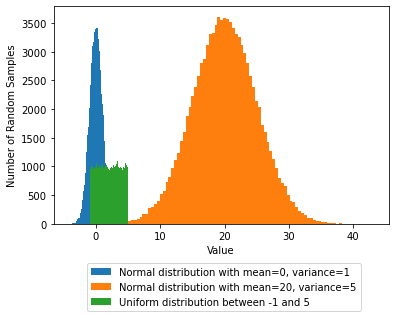

In [19]:
plt.hist(my_random_array_1, bins=100, label='Normal distribution with mean=0, variance=1')
plt.hist(my_random_array_2, bins=100, label='Normal distribution with mean=20, variance=5')
plt.hist(my_random_array_3, bins=100, label='Uniform distribution between -1 and 5');

plt.xlabel('Value')
plt.ylabel('Number of Random Samples')

plt.legend(loc=(0.1,-0.4))

---

### Index/slicing ndarrays

**To select specific elements within an ndarray, you can use slicing, or indexing.**

The syntax for specifying a **slice** is `x[i:j:k]` where for an array `x`, `i` specifies the index to start the slice at, `j` the index to end the slice, and `k` the step size to take moving between `i` and `j`. A step size of 1 does not need to be explicitly stated, it is the default when no step size is provided (`x[i:j]`).

In [20]:
# Create a one dimensional array to work with
one_dimensional_array = np.arange(0,10,1)
# Print out our array
print("\n A one dimensional array:\n{}".format(one_dimensional_array) )


 A one dimensional array:
[0 1 2 3 4 5 6 7 8 9]


**Slicing an array:** Starting at the first element (index=0), slice until the fifth element, with a step size of 2

In [21]:
# Starting at the first element (index=0), slice until the fifth element, with a step size of 2
one_dimensional_array[0:5:2]

array([0, 2, 4])

**Negative indexes** will count backwards from the last element in an array (where the last element has index of -1).

In [22]:
# Select the second-to-last element of this one-dimensional array
one_dimensional_array[-2]

8

**We can use these methods to change the values in the array.** To do this, we first specify the index we want to change, then assign a new value with `=`

In [23]:
one_dimensional_array[0] = 10

# Print out the array now that we've change one of its values
print("\n Our modified array:\n{}".format(one_dimensional_array) )


 Our modified array:
[10  1  2  3  4  5  6  7  8  9]


**And can perform all sorts of math functions on the entire array or segments of the array.**

Note that here we're using a shorthand syntax where `x = x * 2` is equivalent to `x *= 2` (similarly `x = x + 1` is equivalent to `x += 1`)

In [24]:
# Multiply the first four values by two, and replace the original values with the new values
one_dimensional_array[0:4] *= 2

In [25]:
one_dimensional_array

array([20,  2,  4,  6,  4,  5,  6,  7,  8,  9])

**We can also use conditional statements to create arrays of boolean values** (`True`/`False`), and use these boolean arrays to select elements from an array.

In [26]:
# Find even numbers by taking modulo 2
even_number_conditional = one_dimensional_array % 2 == 0
print(even_number_conditional)

[ True  True  True  True  True False  True False  True False]


In [27]:
# Now use this to select only where our boolean array is True
one_dimensional_array[even_number_conditional]

array([20,  2,  4,  6,  4,  6,  8])

In [28]:
# We can use the "~" (bitwise not) operator to invert our boolean array values, and then select only odd numbers
print(~even_number_conditional)
one_dimensional_array[~even_number_conditional]

[False False False False False  True False  True False  True]


array([5, 7, 9])

---
### Working with more than one dimension

**We can slice through multiple dimensions**, separating the slice for each dimension with a comma like `x[i:j:k,l:m:n]` where `i`, `j`, and `k` slice the first dimension, and `l`, `m`, and `n` slice the second dimension.

In [29]:
# Create a two dimensional array to work with
two_dimensional_array = np.random.normal(0, 1, (3,3))
print("\n A two dimensional array:\n{}".format(two_dimensional_array) )


 A two dimensional array:
[[-0.74664529  0.53067262  0.45067967]
 [-1.01182386  0.02002937 -0.54327277]
 [-0.1460555   0.25628652  0.04196928]]


In [30]:
# Select the first two indices of each dimension from a 2-dimensional array
two_dimensional_array[0:2, 0:2]

array([[-0.74664529,  0.53067262],
       [-1.01182386,  0.02002937]])

A single index can also be specified to select a single element from the array.

In [31]:
# Select the single value from the center of this 3x3 array
two_dimensional_array[1,1]

0.020029370780407105

---
---